In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as patches
import datetime as dt
import gsw

In [2]:
df = pd.read_csv('sw_results.csv')
df['D_int'][df['D_int'] > 10] = 9.5
df

/tmp/ipykernel_20414/746542652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['D_int'][df['D_int'] > 10] = 9.5


,Year,Flow Class,Qr,S_top,S_bot,T_top,T_bot,V_top,V_mix,rho_top,rho_bot,Fr,Ls,D_int,u_exit,S_top_prime,S_bot_prime,S_top_mix,S_bot_mix
0,2018,high,413.23,2.21,20.39,14.50,12.63,-0.1807,-0.1490,1000.89,1015.12,1.4889,-20,9.50,0.2066,3.55,27.63,15.75,29.29
1,2018,low,53.15,6.60,22.14,5.35,7.20,-0.2172,-0.0590,1005.19,1017.21,0.2270,1420,3.72,0.0266,11.88,28.55,14.41,28.88
2,2018,max,379.02,4.86,21.91,8.49,11.08,-0.1890,-0.0845,1003.63,1016.52,1.5085,-20,9.50,0.1895,7.10,28.09,19.33,29.86
3,2019,high,367.81,2.98,21.29,15.26,13.05,-0.1723,-0.1388,1001.37,1015.73,1.3126,-10,9.50,0.1839,4.46,27.82,16.53,29.33
4,2019,low,24.18,7.80,23.20,4.52,6.87,-0.2280,-0.0569,1006.16,1018.08,0.1043,8500,2.22,0.0121,11.58,28.22,13.59,28.67
5,2019,max,437.98,2.16,22.26,18.27,14.37,-0.1721,-0.1342,1000.21,1016.23,1.4022,-10,9.50,0.2190,3.37,28.02,16.83,29.31
6,2018,mid,241.86,4.53,23.29,15.90,13.86,-0.1974,-0.0941,1002.44,1017.12,0.8461,0,8.95,0.1209,6.73,28.34,19.68,29.54
7,2019,mid,174.03,6.98,24.71,11.63,12.05,-0.2049,-0.0870,1004.95,1018.53,0.6590,20,7.57,0.0870,7.54,28.12,20.14,29.66


0.0427391796035127
0.0034460978372712614


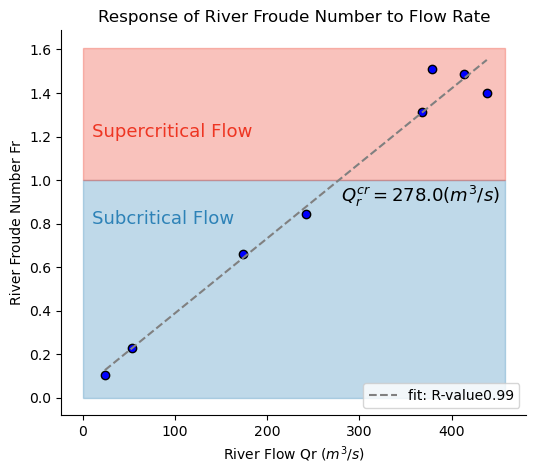

In [3]:
subcritical = patches.Rectangle((0, 0), df['Qr'].max()+20, 1, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
supercritical = patches.Rectangle((0, 1), df['Qr'].max()+20, df['Fr'].max()-0.9, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)


QrFr = stats.linregress(df['Qr'], df['Fr'])
Qr_crit = (1 - QrFr.intercept)/QrFr.slope

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.add_patch(subcritical)
ax.add_patch(supercritical)

ax.plot(df['Qr'], df['Fr'],'bo',markeredgecolor='k')
ax.plot(df['Qr'].sort_values(ascending=True), QrFr.intercept + QrFr.slope * df['Qr'].sort_values(ascending=True), 'grey', linestyle='--',label=r'fit: R-value'+str(round(QrFr.rvalue, 2)))
ax.set_xlabel(r"River Flow Qr $(m^3/s)$")
ax.set_ylabel('River Froude Number Fr')
ax.set_title('Response of River Froude Number to Flow Rate')
ax.legend(loc='lower right')

ax.text(10, 0.8, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(10, 1.2, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(280, 0.90, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(QrFr.intercept)
print(QrFr.slope)

In [4]:
def Fr_from_Qr(Qr):
    return QrFr.slope * Qr + QrFr.intercept

In [5]:
uexitVmix = stats.linregress(df['u_exit'], -df['V_mix'])
uexitVmix.rvalue

0.8697284709388616

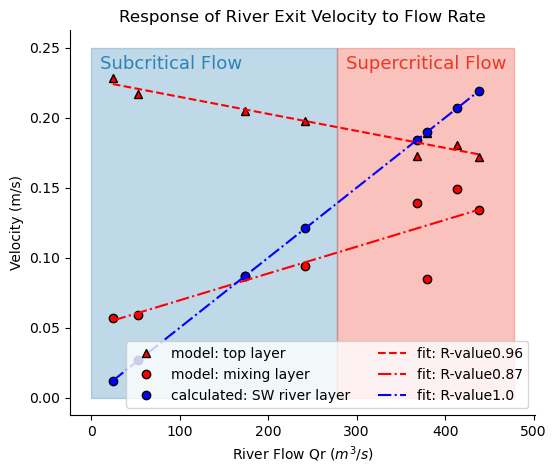

In [6]:
est = patches.Rectangle((0, 0), 278, 0.25, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
flushed = patches.Rectangle((278, 0), df['Qr'].max()-278+40, 0.25, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)

QrVmix = stats.linregress(df['Qr'], -df['V_mix'])
QrVtop = stats.linregress(df['Qr'], -df['V_top'])
Qruexit = stats.linregress(df['Qr'], df['u_exit'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.add_patch(est)
ax.add_patch(flushed)

ax.plot(df['Qr'], -df['V_top'],'r^',markeredgecolor='k',label='model: top layer')
ax.plot(df['Qr'], -df['V_mix'],'ro',markeredgecolor='k',label='model: mixing layer')
ax.plot(df['Qr'], df['u_exit'],'bo',markeredgecolor='k',label='calculated: SW river layer')


ax.plot(df['Qr'].sort_values(ascending=True), QrVtop.intercept + QrVtop.slope * df['Qr'].sort_values(ascending=True), 'r--',label=r'fit: R-value'+str(round(-QrVtop.rvalue, 2)))
ax.plot(df['Qr'].sort_values(ascending=True), QrVmix.intercept + QrVmix.slope * df['Qr'].sort_values(ascending=True), 'r', linestyle='dashdot',label=r'fit: R-value'+str(round(QrVmix.rvalue, 2)))
ax.plot(df['Qr'].sort_values(ascending=True), Qruexit.intercept + Qruexit.slope * df['Qr'].sort_values(ascending=True), 'b', linestyle='dashdot',label=r'fit: R-value'+str(round(Qruexit.rvalue, 2)))

ax.set_xlabel(r'River Flow Qr $(m^3/s)$')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Response of River Exit Velocity to Flow Rate')
ax.legend(ncol=2)

ax.text(10, 0.235, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(288, 0.235, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

1.82645448961302
0.030724995015506105


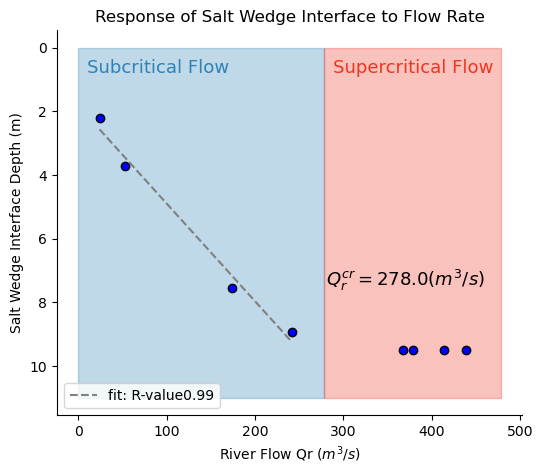

In [7]:
est = patches.Rectangle((0, 0), 278, 11, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
flushed = patches.Rectangle((278, 0), df['Qr'].max()-278+40, 11, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)


QrDint = stats.linregress(df['Qr'][df['D_int'] < 9.5], df['D_int'][df['D_int'] < 9.5])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.add_patch(est)
ax.add_patch(flushed)

ax.plot(df['Qr'], df['D_int'],'bo',markeredgecolor='k')
ax.plot(df['Qr'][df['D_int'] < 9.5].sort_values(ascending=True), QrDint.intercept + QrDint.slope * df['Qr'][df['D_int'] < 9.5].sort_values(ascending=True), 'grey', linestyle='--',label=r'fit: R-value'+str(round(QrDint.rvalue, 2)))
ax.set_xlabel(r'River Flow Qr $(m^3/s)$')
ax.set_ylabel('Salt Wedge Interface Depth (m)')
ax.set_title('Response of Salt Wedge Interface to Flow Rate')
ax.legend(loc='lower left')
ax.invert_yaxis()

ax.text(10, 0.8, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(288, 0.8, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(280, 7.5, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(QrDint.intercept)
print(QrDint.slope)

In [8]:
def entrainment_vel(u_exit, h0, delta_x, S_top_prime, S_bot_prime, S_top, S_bot):
    return ((u_exit * h0)/delta_x) * ((S_top_prime - S_top)/((S_bot + S_bot_prime)/2 - S_top_prime))


In [9]:
deltax = 4400  # meters
We = 3000  # meters, width of the estuary
df['wE1'] = entrainment_vel(df['u_exit'], df['D_int'], deltax, df['S_top_mix'], df['S_bot_mix'], df['S_top'], df['S_bot'])
df['wE2'] = entrainment_vel(-df['V_mix'], df['D_int'], deltax, df['S_top_mix'], df['S_bot_mix'], df['S_top'], df['S_bot'])

df['Qe1'] = df['wE1'] * deltax * We
df['Qe2'] = df['wE2'] * deltax * We

In [10]:
df['beta'] = gsw.beta(df['S_top_mix'], df['T_top'], df['D_int'])
df['Frf1'] = df['u_exit']/(df['beta'] * 9.81 * 10 * df['S_bot_mix'])
df

,Year,Flow Class,Qr,S_top,S_bot,T_top,T_bot,V_top,V_mix,rho_top,...,S_top_prime,S_bot_prime,S_top_mix,S_bot_mix,wE1,wE2,Qe1,Qe2,beta,Frf1
0,2018,high,413.23,2.21,20.39,14.50,12.63,-0.1807,-0.1490,1000.89,...,3.55,27.63,15.75,29.29,0.000664,0.000479,8770.613201,6325.369637,0.000752,0.095590
1,2018,low,53.15,6.60,22.14,5.35,7.20,-0.2172,-0.0590,1005.19,...,11.88,28.55,14.41,28.88,0.000016,0.000035,208.868951,463.280757,0.000777,0.012091
2,2018,max,379.02,4.86,21.91,8.49,11.08,-0.1890,-0.0845,1003.63,...,7.10,28.09,19.33,29.86,0.000903,0.000403,11922.021739,5316.152174,0.000765,0.084570
3,2019,high,367.81,2.98,21.29,15.26,13.05,-0.1723,-0.1388,1001.37,...,4.46,27.82,16.53,29.33,0.000613,0.000462,8088.562927,6104.907745,0.000750,0.085213
4,2019,low,24.18,7.80,23.20,4.52,6.87,-0.2280,-0.0569,1006.16,...,11.58,28.22,13.59,28.67,0.000003,0.000013,37.796107,177.735412,0.000780,0.005519
5,2019,max,437.98,2.16,22.26,18.27,14.37,-0.1721,-0.1342,1000.21,...,3.37,28.02,16.83,29.31,0.000775,0.000475,10224.768844,6265.588945,0.000743,0.102452
6,2018,mid,241.86,4.53,23.29,15.90,13.86,-0.1974,-0.0941,1002.44,...,6.73,28.34,19.68,29.54,0.000553,0.000431,7302.063808,5683.409465,0.000747,0.055846
7,2019,mid,174.03,6.98,24.71,11.63,12.05,-0.2049,-0.0870,1004.95,...,7.54,28.12,20.14,29.66,0.000280,0.000280,3690.721533,3690.721533,0.000757,0.039517


In [11]:
df['Frf1'].max()

0.10245206682412497

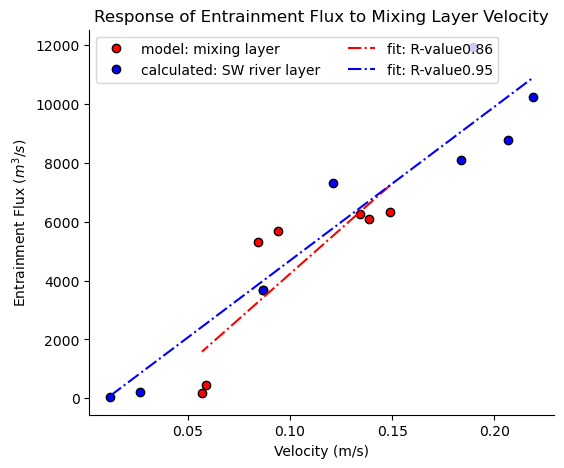

In [12]:
VmixQe2 = stats.linregress(-df['V_mix'], df['Qe2'])
uexitQe1 = stats.linregress(df['u_exit'], df['Qe1'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))


ax.plot(-df['V_mix'], df['Qe2'],'ro', markeredgecolor='k',label='model: mixing layer')
ax.plot(df['u_exit'], df['Qe1'],'bo', markeredgecolor='k',label='calculated: SW river layer')

ax.plot(-df['V_mix'].sort_values(ascending=True), VmixQe2.intercept + VmixQe2.slope * -df['V_mix'].sort_values(ascending=True), 'r', linestyle='dashdot',label=r'fit: R-value'+str(round(VmixQe2.rvalue, 2)))
ax.plot(df['u_exit'].sort_values(ascending=True), uexitQe1.intercept + uexitQe1.slope * df['u_exit'].sort_values(ascending=True), 'b', linestyle='dashdot',label=r'fit: R-value'+str(round(uexitQe1.rvalue, 2)))



ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel(r'Entrainment Flux $(m^3/s)$')
ax.set_title('Response of Entrainment Flux to Mixing Layer Velocity')
ax.legend(ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [13]:
Qe1Qe2 = stats.linregress(df['Qe1'], df['Qe2'])
Qe1Qe2.rvalue

0.9159879599158222

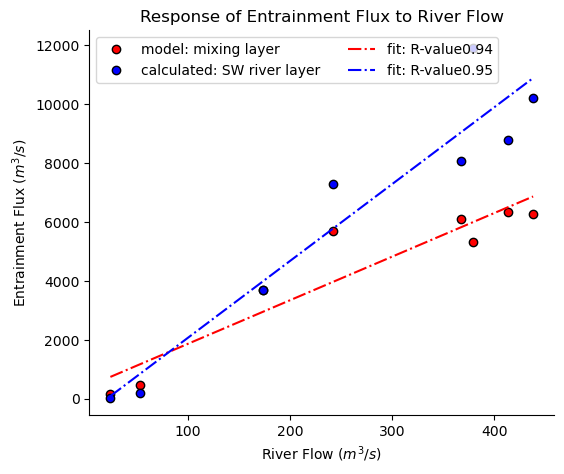

In [14]:
QrQe2 = stats.linregress(df['Qr'], df['Qe2'])
QrQe1 = stats.linregress(df['Qr'], df['Qe1'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))


ax.plot(df['Qr'], df['Qe2'],'ro', markeredgecolor='k',label='model: mixing layer')
ax.plot(df['Qr'], df['Qe1'],'bo', markeredgecolor='k',label='calculated: SW river layer')

ax.plot(df['Qr'].sort_values(ascending=True), QrQe2.intercept + QrQe2.slope * df['Qr'].sort_values(ascending=True), 'r', linestyle='dashdot',label=r'fit: R-value'+str(round(QrQe2.rvalue, 2)))
ax.plot(df['Qr'].sort_values(ascending=True), QrQe1.intercept + QrQe1.slope * df['Qr'].sort_values(ascending=True), 'b', linestyle='dashdot',label=r'fit: R-value'+str(round(QrQe1.rvalue, 2)))



ax.set_xlabel(r'River Flow $(m^3/s)$')
ax.set_ylabel(r'Entrainment Flux $(m^3/s)$')
ax.set_title('Response of Entrainment Flux to River Flow')
ax.legend(ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [15]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Squamish_Brackendale_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
river = riv_df.rename(columns=mapping)
riv_10 = river[river['YYYY'] >= 2013]
riv_10['DateTime'] = pd.to_datetime(dict(year=riv_10['YYYY'], month=riv_10['MM'], day=riv_10['DD']))

/tmp/ipykernel_20414/1575600269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riv_10['DateTime'] = pd.to_datetime(dict(year=riv_10['YYYY'], month=riv_10['MM'], day=riv_10['DD']))


In [16]:
riv_10

,YYYY,MM,DD,DISCHARGE,4,DateTime
21607,2013,1,1,30.0000,NaN,2013-01-01
21608,2013,1,2,35.0000,NaN,2013-01-02
21609,2013,1,3,38.1000,NaN,2013-01-03
21610,2013,1,4,30.9000,NaN,2013-01-04
21611,2013,1,5,31.9000,NaN,2013-01-05
...,...,...,...,...,...,...
25382,2023,5,4,584.5436,NaN,2023-05-04
25383,2023,5,5,624.0106,NaN,2023-05-05
25384,2023,5,6,472.3056,NaN,2023-05-06
25385,2023,5,7,373.6215,NaN,2023-05-07


In [17]:
(pd.to_datetime(riv_10['DateTime'][21607]) - dt.datetime(1970,1,1))

Timedelta('15706 days 00:00:00')

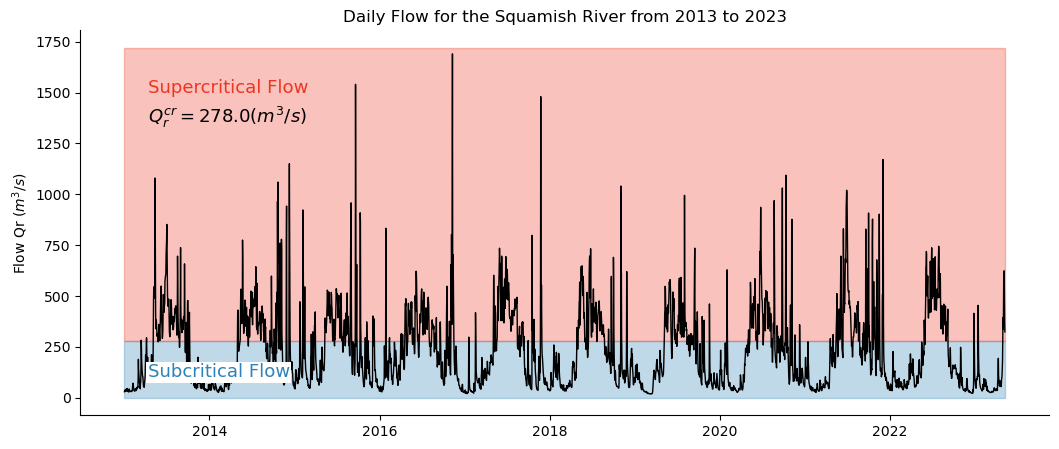

In [18]:
subcritical = patches.Rectangle((0+15706 , 0), len(riv_10), Qr_crit, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
supercritical = patches.Rectangle((0+15706 , Qr_crit), len(riv_10), riv_10['DISCHARGE'].max()-Qr_crit+30, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 5))

ax.add_patch(subcritical)
ax.add_patch(supercritical)

ax.plot(riv_10['DateTime'], riv_10['DISCHARGE'],'k',linewidth=1)
ax.set_ylabel(r'Flow Qr $(m^3/s)$')
ax.set_title('Daily Flow for the Squamish River from 2013 to 2023')

ax.text(100+15706, 100, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13}, bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax.text(100+15706, 1500, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(100+15706, 1350, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [19]:
sup_days = (riv_10['DISCHARGE'] > Qr_crit).sum()
sub_days = (riv_10['DISCHARGE'] < Qr_crit).sum()
total_days = (riv_10['DISCHARGE'] > 0).sum()

In [20]:
print('Percent supercritical: {}'.format(str(100*round(sup_days/total_days, 2))))
print('Percent subcritical: {}'.format(str(100*round(sub_days/total_days, 2))))

Percent supercritical: 35.0
Percent subcritical: 65.0


## force a prediction here

In [21]:
river_2018 = river[river['YYYY'] == 2019]
river_2018['DateTime'] = pd.to_datetime(dict(year=river_2018['YYYY'], month=river_2018['MM'], day=river_2018['DD']))
river_mod = river_2018.copy()
# river_mod['DISCHARGE'] = river_2018['DISCHARGE'].values*0.7
river_mod['DISCHARGE'][90:120] = river_mod['DISCHARGE'][90:120]*1.2
river_mod['DISCHARGE'][210:220] = river_mod['DISCHARGE'][120:130]*1.5
river_mod['DISCHARGE'][255:265] = river_mod['DISCHARGE'][255:265]*1.5
river_mod['DISCHARGE'][315:325] = river_mod['DISCHARGE'][315:325]*1.5
river_mod['DISCHARGE'][120:270] = river_mod['DISCHARGE'][120:270]*(1/2.1)
river_mod['DISCHARGE'] = 2*river_mod['DISCHARGE']
# n_largest = river_mod.nlargest(10, 'DISCHARGE').index.values

/tmp/ipykernel_20414/3945204413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  river_2018['DateTime'] = pd.to_datetime(dict(year=river_2018['YYYY'], month=river_2018['MM'], day=river_2018['DD']))
/tmp/ipykernel_20414/3945204413.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  river_mod['DISCHARGE'][90:120] = river_mod['DISCHARGE'][90:120]*1.2
/tmp/ipykernel_20414/3945204413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [22]:
river_mod

,YYYY,MM,DD,DISCHARGE,4,DateTime
23798,2019,1,1,185.47222,NaN,2019-01-01
23799,2019,1,2,152.96388,NaN,2019-01-02
23800,2019,1,3,162.16806,NaN,2019-01-03
23801,2019,1,4,318.44440,NaN,2019-01-04
23802,2019,1,5,318.04160,NaN,2019-01-05
...,...,...,...,...,...,...
24158,2019,12,27,81.84398,NaN,2019-12-27
24159,2019,12,28,78.15816,NaN,2019-12-28
24160,2019,12,29,76.62152,NaN,2019-12-29
24161,2019,12,30,76.91598,NaN,2019-12-30


In [23]:
(pd.to_datetime(river_mod['DateTime'][23798]) - dt.datetime(1970,1,1))

Timedelta('17897 days 00:00:00')

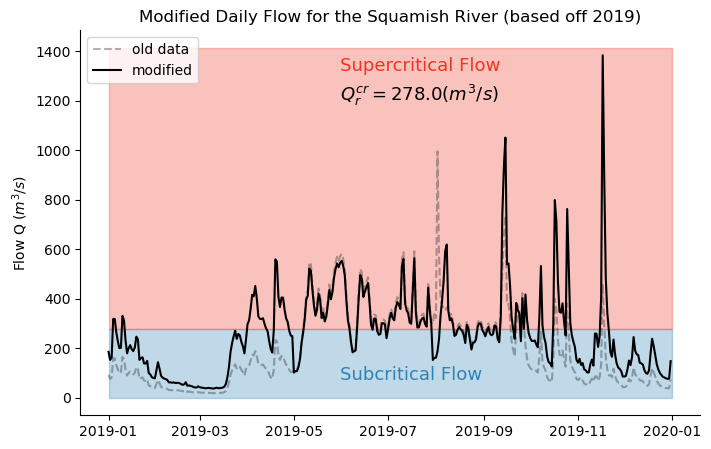

In [24]:
subcritical = patches.Rectangle((0+17897, 0), len(river_mod), Qr_crit, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
supercritical = patches.Rectangle((0+17897, Qr_crit), len(river_mod), river_mod['DISCHARGE'].max()-Qr_crit+30, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.add_patch(subcritical)
ax.add_patch(supercritical)

ax.plot(river_2018['DateTime'], river_2018['DISCHARGE'],'k',alpha=0.3,linestyle='--',label='old data')
ax.plot(river_mod['DateTime'], river_mod['DISCHARGE'],'k',label='modified')
ax.set_ylabel(r'Flow Q $(m^3/s)$')
ax.set_title('Modified Daily Flow for the Squamish River (based off 2019)')

ax.legend()

ax.text(150+17897, 70, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
ax.text(150+17897, 1320, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
ax.text(150+17897, 1200, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [25]:
river_mod['Fr_pred'] = Fr_from_Qr(river_mod['DISCHARGE'].values)

In [26]:
sup_days = (river_mod['DISCHARGE'] > Qr_crit).sum()
sub_days = (river_mod['DISCHARGE'] < Qr_crit).sum()
total_days = (river_mod['DISCHARGE'] > 0).sum()

In [27]:
print('Percent supercritical: {}'.format(str(100*round(sup_days/total_days, 2))))
print('Percent subcritical: {}'.format(str(100*round(sub_days/total_days, 2))))

Percent supercritical: 41.0
Percent subcritical: 59.0


In [28]:
# subcritical = patches.Rectangle((0, 0), river_mod['DISCHARGE'].max()+20, 1, linewidth=1, edgecolor='#2D82B7', facecolor='#2D82B7',alpha=0.3)
# supercritical = patches.Rectangle((0, 1), river_mod['DISCHARGE'].max()+20, Fr_pred.max()-0.9, linewidth=1, edgecolor='#EE3522', facecolor='#EE3522',alpha=0.3)

# fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# ax.add_patch(subcritical)
# ax.add_patch(supercritical)

# ax.plot(river_mod['DISCHARGE'], Fr_pred,'bo',markeredgecolor='k')
# ax.set_xlabel(r"River Flow Qr $(m^3/s)$")
# ax.set_ylabel('River Froude Number Fr')
# ax.set_title('Response of River Froude Number to Flow Rate')
# ax.legend(loc='lower right')

# ax.text(10, 0.8, "Subcritical Flow", {'color': '#2D82B7', 'fontsize': 13})
# ax.text(10, 1.2, "Supercritical Flow", {'color': '#EE3522', 'fontsize': 13})
# ax.text(280, 0.90, r"$Q_r^{cr} =$" + str(round(Qr_crit, 0)) + r"$(m^3/s)$", {'color': '#000000', 'fontsize': 13})

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)